In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
import seaborn as sns

In [2]:
import warnings 
warnings.simplefilter("ignore")

In [3]:
df = pd.read_csv('train.csv')
df.head()

,Booking_ID,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,INN25630,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,INN14474,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,INN23721,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,INN05844,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,INN18710,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


In [4]:
df.columns

Index(['Booking_ID', 'no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [5]:
df.drop(columns=['Booking_ID'] ,inplace=True)

In [6]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [7]:
df.shape

(29020, 18)

In [9]:
df.isnull().sum()

no_of_adults                            0
no_of_children                          0
no_of_weekend_nights                    0
no_of_week_nights                       0
type_of_meal_plan                       0
required_car_parking_space              0
room_type_reserved                      0
lead_time                               0
arrival_year                            0
arrival_month                           0
arrival_date                            0
market_segment_type                     0
repeated_guest                          0
no_of_previous_cancellations            0
no_of_previous_bookings_not_canceled    0
avg_price_per_room                      0
no_of_special_requests                  0
booking_status                          0
dtype: int64

In [8]:
df.duplicated().sum()

np.int64(7661)

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(21359, 18)

In [11]:
df.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests', 'booking_status'],
      dtype='object')

In [12]:
cat_cols = [col for col in df.columns if df[col].dtype == 'object']
cat_cols

['type_of_meal_plan',
 'room_type_reserved',
 'market_segment_type',
 'booking_status']

In [19]:
num_cols = [col for col in df.columns if df[col].dtype != 'object']
num_cols

['no_of_adults',
 'no_of_children',
 'no_of_weekend_nights',
 'no_of_week_nights',
 'required_car_parking_space',
 'lead_time',
 'arrival_year',
 'arrival_month',
 'arrival_date',
 'repeated_guest',
 'no_of_previous_cancellations',
 'no_of_previous_bookings_not_canceled',
 'avg_price_per_room',
 'no_of_special_requests']

In [13]:
df['required_car_parking_space'].value_counts()

required_car_parking_space
0    20452
1      907
Name: count, dtype: int64

### DATA ANALYSIS

In [14]:
data = df.copy()

In [15]:
data.head()

,no_of_adults,no_of_children,no_of_weekend_nights,no_of_week_nights,type_of_meal_plan,required_car_parking_space,room_type_reserved,lead_time,arrival_year,arrival_month,arrival_date,market_segment_type,repeated_guest,no_of_previous_cancellations,no_of_previous_bookings_not_canceled,avg_price_per_room,no_of_special_requests,booking_status
0,2,1,2,1,Meal Plan 1,0,Room_Type 1,26,2017,10,17,Online,0,0,0,161.00,0,Not_Canceled
1,2,1,1,1,Meal Plan 1,0,Room_Type 1,98,2018,7,16,Online,0,0,0,121.50,2,Not_Canceled
2,2,0,0,3,Meal Plan 1,0,Room_Type 1,433,2018,9,8,Offline,0,0,0,70.00,0,Canceled
3,2,0,2,5,Meal Plan 1,0,Room_Type 1,195,2018,8,8,Offline,0,0,0,72.25,0,Not_Canceled
4,1,0,0,2,Meal Plan 1,0,Room_Type 1,188,2018,6,15,Offline,0,0,0,130.00,0,Canceled


#### UNIAVARIATE ANALYSIS

In [17]:
def num_plot_dist(df, num_features):
    fig , axes = plt.subplots(len(num_features), 2 , figsize = (15, 5*len(num_features)))
    if len(num_features) == 1:
        axes = [axes]
    
    for i , columns in enumerate(num_features):
        sns.histplot(data = df , x = columns , kde = True , ax = axes[i][0] , palette='viridis')
        axes[i][0].set_title(f'Histogram for {columns}')
        sns.boxplot(data = df , x = columns , ax = axes[i][1] , palette='viridis')
        axes[i][1].set_title(f'Boxplot for {columns}')
    plt.tight_layout()
    plt.show()
    

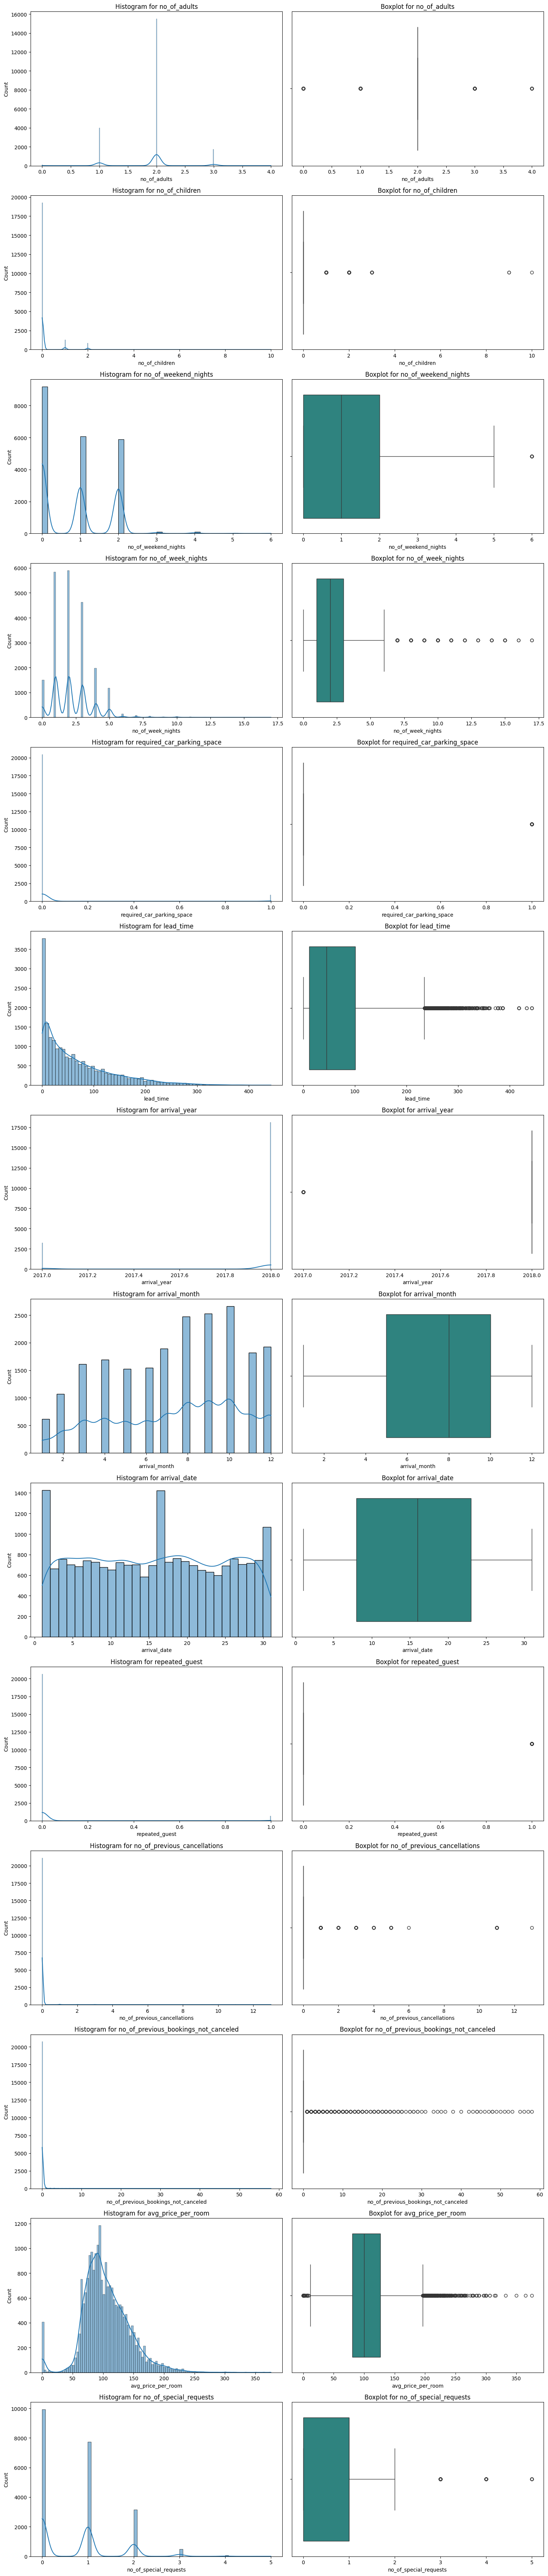

In [20]:
num_plot_dist(data , num_cols)

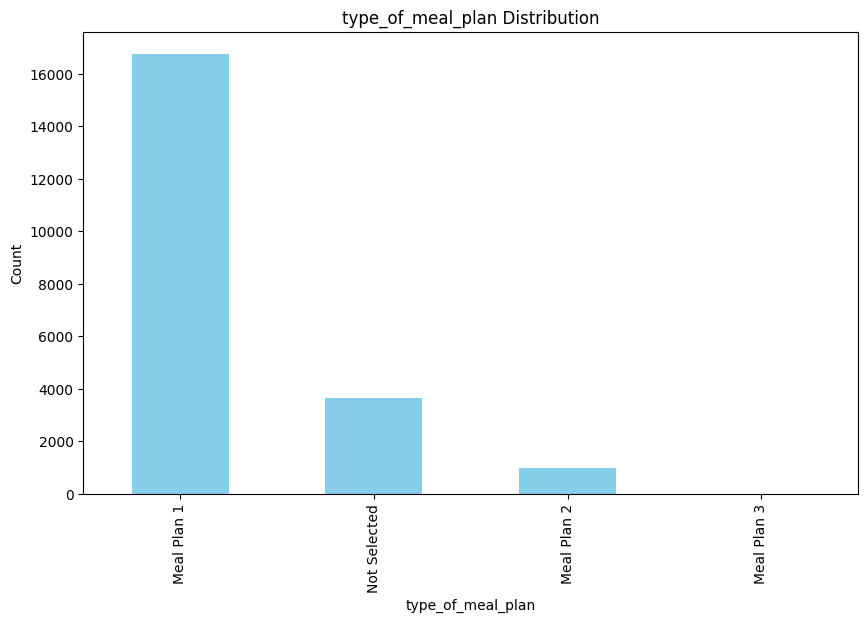

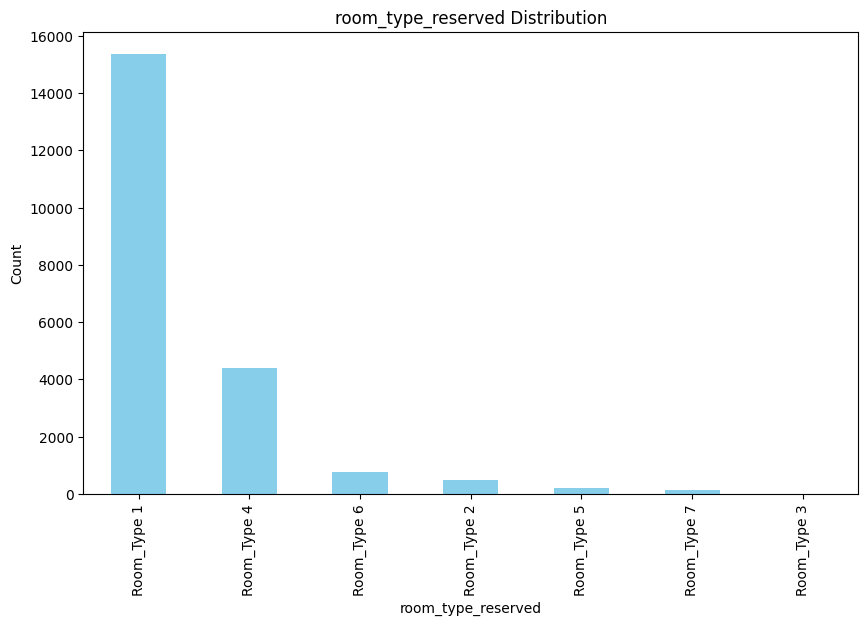

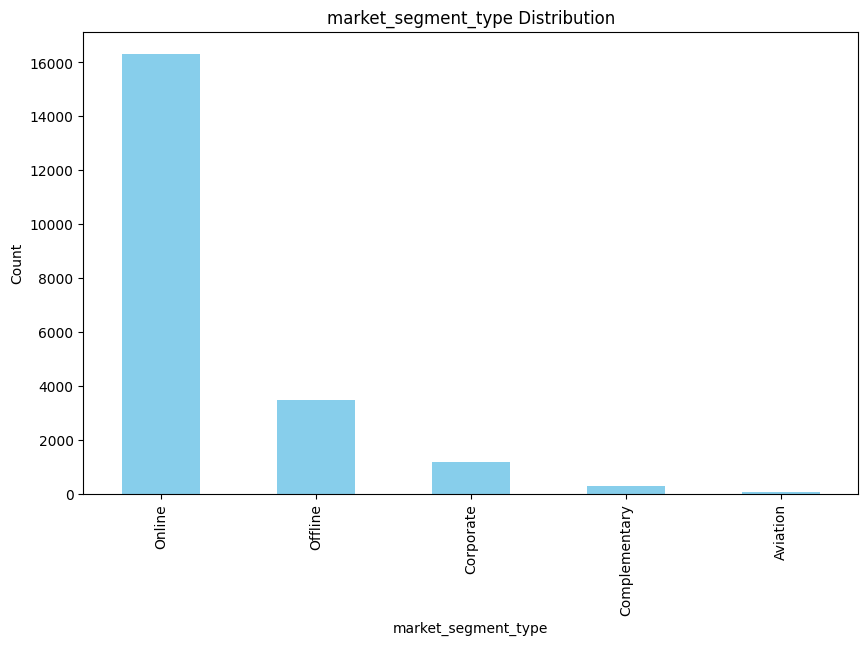

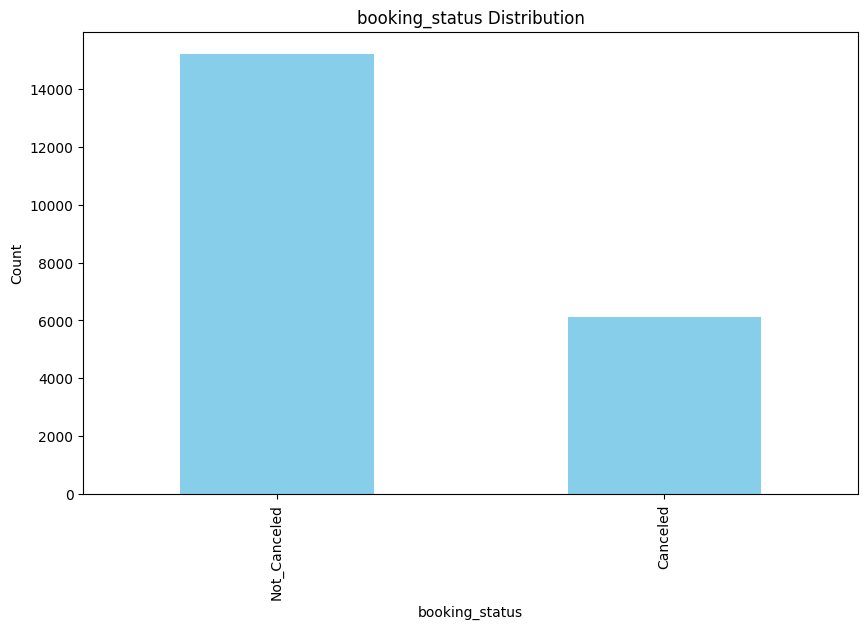

In [21]:
for cat_feature in cat_cols:
    plt.figure(figsize=(10,6))
    data[cat_feature].value_counts().plot(kind='bar', color='skyblue')
    plt.title(f'{cat_feature} Distribution')
    plt.xlabel(cat_feature)
    plt.ylabel('Count')
    plt.show()

#### Bivarate Analysis

In [28]:
def plot_bivarate_num(df, target , num_features):
    num_plots = len(num_features)
    num_rows = (num_plots + 1) // 2
    
    fig , axes = plt.subplots(num_rows , 2 , figsize = (15 , 5*num_rows))
    axes = axes.flatten()

    for i , columns in enumerate(num_features):
        sns.boxplot(data = df , x = target , y = columns , ax = axes[i] , palette='viridis')
        axes[i].set_title(f'Boxplot of {columns} vs {target}')

    plt.tight_layout()
    plt.show()

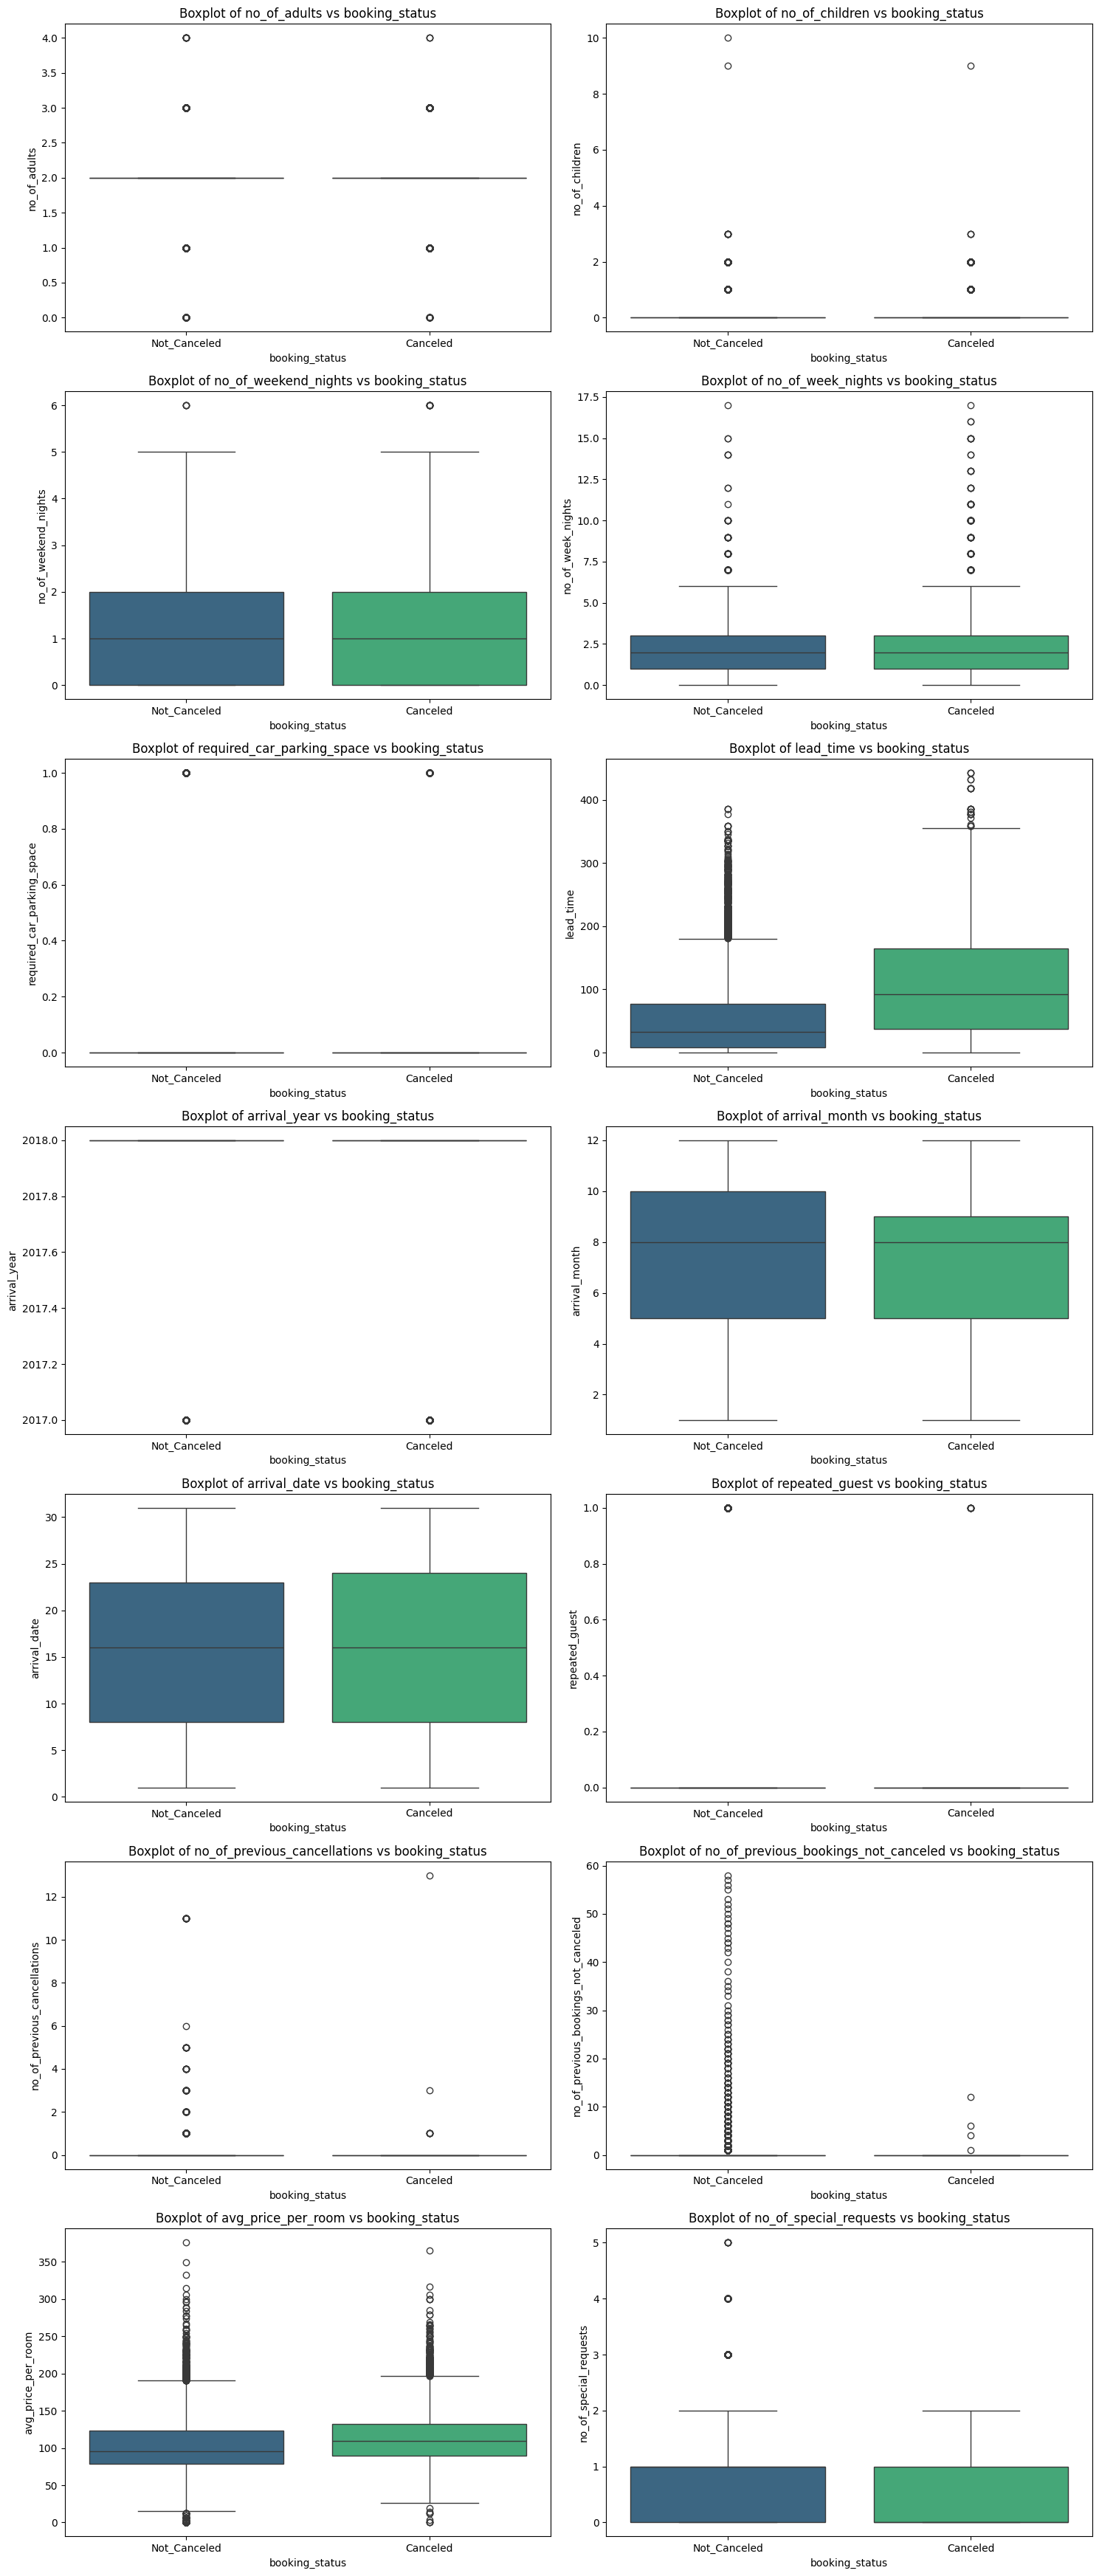

In [29]:
plot_bivarate_num(data , 'booking_status' , num_cols)

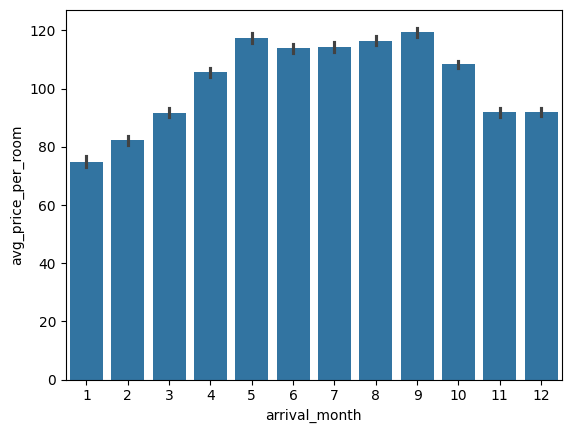

In [31]:
sns.barplot(x='arrival_month', y='avg_price_per_room', data=data )
plt.show()

In [32]:
def plot_bivarate_cat(df,target , cat_features):
    num_plots = len(cat_features)
    num_rows = (num_plots + 1) // 2
    
    fig , axes = plt.subplots(num_rows , 2 , figsize = (15 , 5*num_rows))
    axes = axes.flatten()

    for i , feature in enumerate(cat_features):
        sns.countplot(data = df , x = feature , hue = target , ax = axes[i] , palette='viridis')
        axes[i].set_title(f'Countplot of {feature} vs {target}')
        axes[i].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()

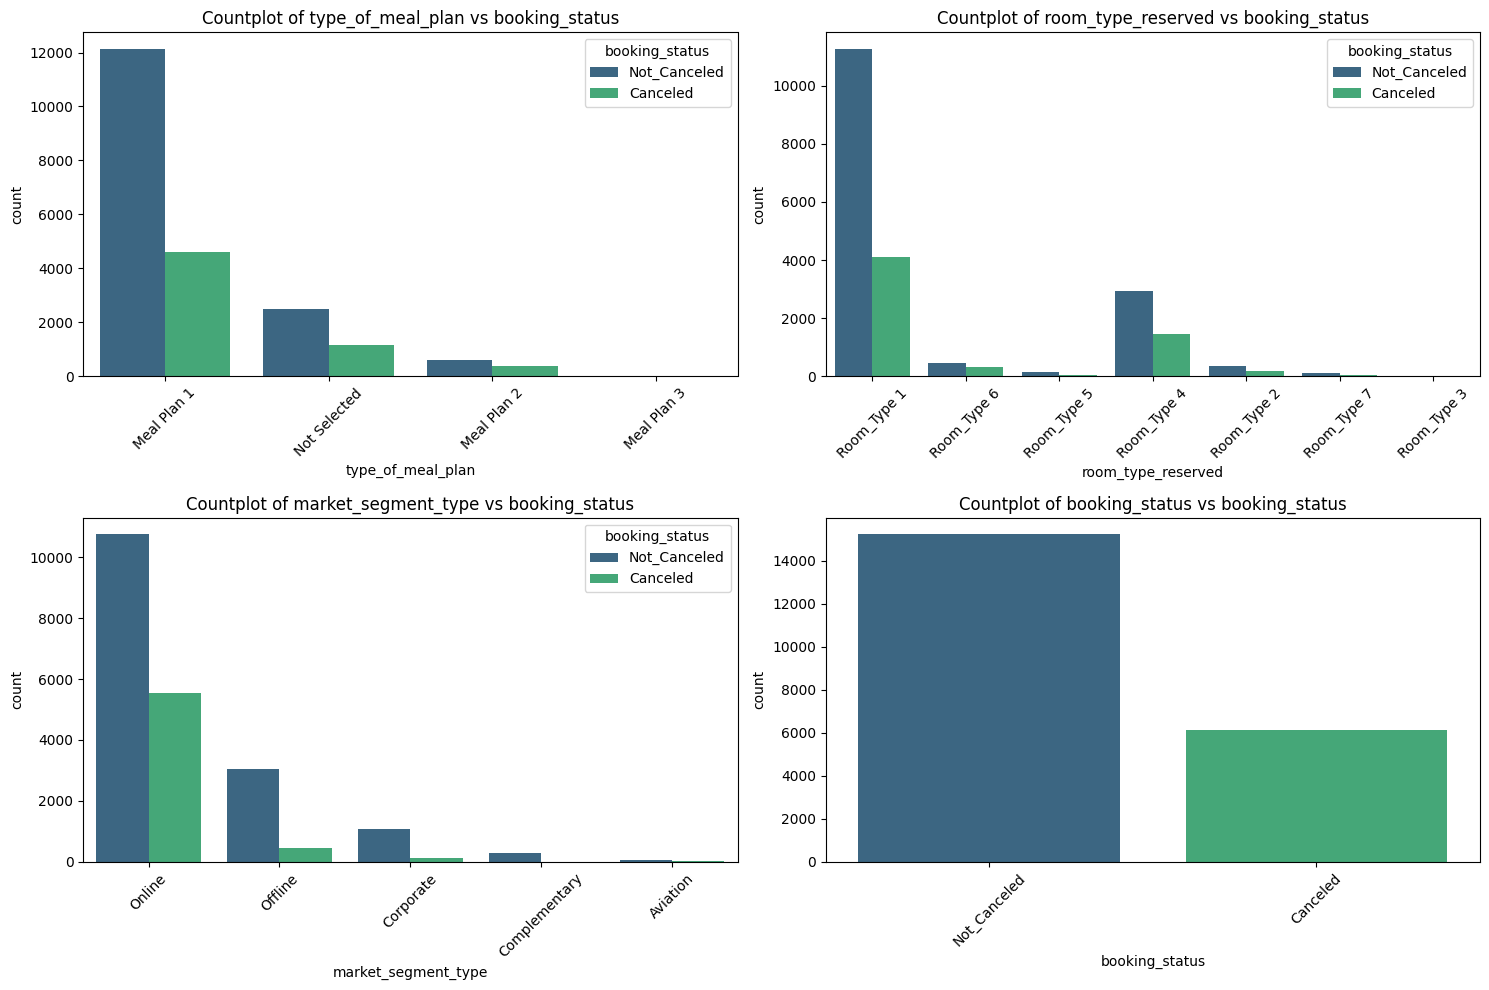

In [33]:
plot_bivarate_cat(data , 'booking_status' , cat_cols)

#### Data Preprocessing

In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  object 
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  object 
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [36]:
#### Label Encoding

from sklearn.preprocessing import LabelEncoder

In [37]:
label_encoder = LabelEncoder()

mappings = {}

for col in cat_cols:
    data[col] = label_encoder.fit_transform(data[col])
    mappings[col] = {label:code for code,label in zip(label_encoder.classes_ , label_encoder.transform(label_encoder.classes_)  )}

In [38]:
mappings

{'type_of_meal_plan': {np.int64(0): 'Meal Plan 1',
  np.int64(1): 'Meal Plan 2',
  np.int64(2): 'Meal Plan 3',
  np.int64(3): 'Not Selected'},
 'room_type_reserved': {np.int64(0): 'Room_Type 1',
  np.int64(1): 'Room_Type 2',
  np.int64(2): 'Room_Type 3',
  np.int64(3): 'Room_Type 4',
  np.int64(4): 'Room_Type 5',
  np.int64(5): 'Room_Type 6',
  np.int64(6): 'Room_Type 7'},
 'market_segment_type': {np.int64(0): 'Aviation',
  np.int64(1): 'Complementary',
  np.int64(2): 'Corporate',
  np.int64(3): 'Offline',
  np.int64(4): 'Online'},
 'booking_status': {np.int64(0): 'Canceled', np.int64(1): 'Not_Canceled'}}

In [40]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 21359 entries, 0 to 29019
Data columns (total 18 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   no_of_adults                          21359 non-null  int64  
 1   no_of_children                        21359 non-null  int64  
 2   no_of_weekend_nights                  21359 non-null  int64  
 3   no_of_week_nights                     21359 non-null  int64  
 4   type_of_meal_plan                     21359 non-null  int64  
 5   required_car_parking_space            21359 non-null  int64  
 6   room_type_reserved                    21359 non-null  int64  
 7   lead_time                             21359 non-null  int64  
 8   arrival_year                          21359 non-null  int64  
 9   arrival_month                         21359 non-null  int64  
 10  arrival_date                          21359 non-null  int64  
 11  market_segment_type 

In [41]:
#### Multicollinearity Check

In [42]:
!pip install statsmodels

   ---------------------------------------- 0.0/9.5 MB ? eta -:--:--
   ----------------------------- ---------- 7.1/9.5 MB 45.8 MB/s eta 0:00:01
   ---------------------------------------- 9.5/9.5 MB 44.3 MB/s eta 0:00:00



[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [43]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

In [44]:
X = add_constant(data)

vif_data = pd.DataFrame()
vif_data["feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [45]:
vif_data

,feature,VIF
0,const,4.100197e+07
1,no_of_adults,1.341180e+00
2,no_of_children,1.282459e+00
3,no_of_weekend_nights,1.073215e+00
4,no_of_week_nights,1.125260e+00
5,type_of_meal_plan,1.178228e+00
6,required_car_parking_space,1.036105e+00
7,room_type_reserved,1.549859e+00
8,lead_time,1.406287e+00
9,arrival_year,1.288533e+00


Text(0.5, 1.0, 'Correlation Heatmap')

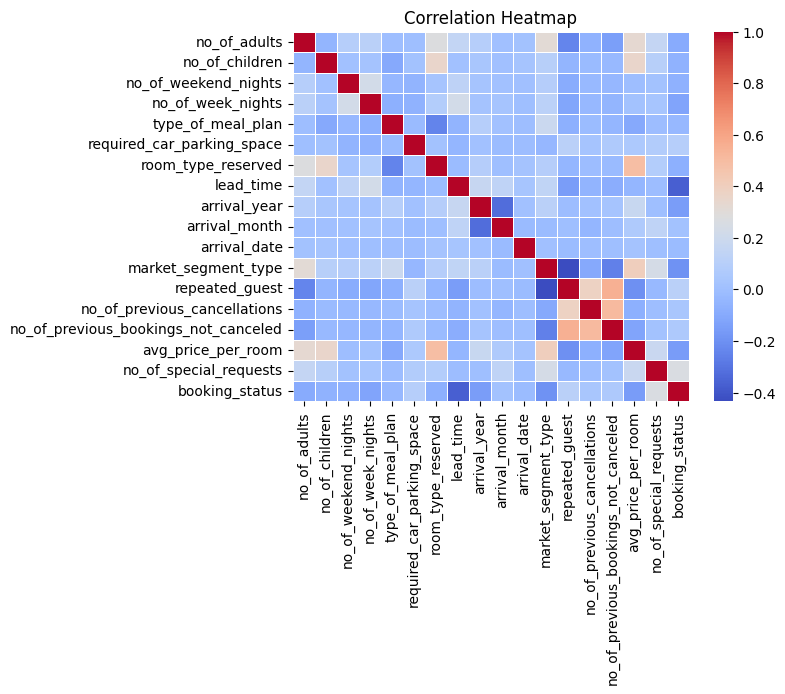

In [50]:
plt.Figure(figsize=(15,15))
sns.heatmap(data.corr(), fmt=".2f", cmap='coolwarm',linewidths=0.5)
plt.title("Correlation Heatmap")

In [55]:
skewness = data.skew()

In [56]:
skewness

no_of_adults                            -0.305652
no_of_children                           4.165696
no_of_weekend_nights                     0.636637
no_of_week_nights                        1.553657
type_of_meal_plan                        1.650716
required_car_parking_space               4.538315
room_type_reserved                       1.392145
lead_time                                1.405258
arrival_year                            -1.953273
arrival_month                           -0.293266
arrival_date                             0.010333
market_segment_type                     -2.333046
repeated_guest                           5.282330
no_of_previous_cancellations            13.270580
no_of_previous_bookings_not_canceled     7.619850
avg_price_per_room                       0.542888
no_of_special_requests                   0.922373
booking_status                          -0.942305
dtype: float64

In [53]:
for col in data.columns:
    if data[col].skew() > 5:
        data[col] = np.log1p(data[col])

In [57]:
#### Imbalance Handling

In [59]:
data['booking_status'].value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [60]:
x= data.drop('booking_status', axis=1)
y= data['booking_status']

In [61]:
x.columns

Index(['no_of_adults', 'no_of_children', 'no_of_weekend_nights',
       'no_of_week_nights', 'type_of_meal_plan', 'required_car_parking_space',
       'room_type_reserved', 'lead_time', 'arrival_year', 'arrival_month',
       'arrival_date', 'market_segment_type', 'repeated_guest',
       'no_of_previous_cancellations', 'no_of_previous_bookings_not_canceled',
       'avg_price_per_room', 'no_of_special_requests'],
      dtype='object')

In [62]:
!pip install imbalanced-learn


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [63]:
y.value_counts()

booking_status
1    15231
0     6128
Name: count, dtype: int64

In [64]:
from imblearn.over_sampling import SMOTE

In [65]:
smote = SMOTE(random_state=42)
X_res , y_res = smote.fit_resample(x, y)

In [66]:

y_res.value_counts()

booking_status
1    15231
0    15231
Name: count, dtype: int64

In [67]:
balanced_data = pd.DataFrame(X_res , columns=x.columns)
balanced_data['booking_status'] = y_res

In [69]:
balanced_data.shape

(30462, 18)

In [70]:
data = balanced_data.copy()

In [71]:
data.shape

(30462, 18)

#### Feature selection

In [72]:
from sklearn.ensemble import RandomForestClassifier

In [73]:
x= data.drop('booking_status', axis=1)
y= data['booking_status']

In [74]:
model = RandomForestClassifier(random_state=42)
model.fit(x, y)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [75]:
feature_importance = model.feature_importances_

In [76]:
feature_importance

array([0.01802569, 0.00691288, 0.02998085, 0.04399606, 0.02026889,
       0.01156087, 0.0196974 , 0.26182448, 0.01640691, 0.08620917,
       0.08407183, 0.05850944, 0.00688628, 0.00036449, 0.00261412,
       0.15063835, 0.1820323 ])

In [ ]:
feature_importance_df = pd.DataFrame({
    'Feature': x.columns,
    'Importance': feature_importance
})

In [80]:
top_feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

In [83]:
top_10_features = top_feature_importance_df["Feature"].head(10).values

top_10_df = data[top_10_features.tolist() + ['booking_status']  ]

In [84]:
top_10_df.head()

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved,booking_status
0,26,0,161.00,10,17,4,1,2,0,0,1
1,98,2,121.50,7,16,4,1,1,0,0,1
2,433,0,70.00,9,8,3,3,0,0,0,0
3,195,0,72.25,8,8,3,5,2,0,0,1
4,188,0,130.00,6,15,3,2,0,0,0,0


In [85]:
len(top_10_df.columns)

11

In [86]:
df = top_10_df.copy()

#### Model Selection

In [87]:
!pip install xgboost lightgbm 

   ---------------------------------------- 0.0/72.0 MB ? eta -:--:--
   --- ------------------------------------ 5.5/72.0 MB 33.3 MB/s eta 0:00:02
   ------- -------------------------------- 12.8/72.0 MB 34.7 MB/s eta 0:00:02
   ----------- ---------------------------- 20.7/72.0 MB 35.8 MB/s eta 0:00:02
   ---------------- ----------------------- 28.8/72.0 MB 36.3 MB/s eta 0:00:02
   -------------------- ------------------- 36.2/72.0 MB 36.3 MB/s eta 0:00:01
   ------------------------ --------------- 43.8/72.0 MB 36.5 MB/s eta 0:00:01
   ---------------------------- ----------- 51.1/72.0 MB 36.4 MB/s eta 0:00:01
   -------------------------------- ------- 59.0/72.0 MB 36.5 MB/s eta 0:00:01
   ------------------------------------- -- 67.1/72.0 MB 36.7 MB/s eta 0:00:01
   ---------------------------------------  71.8/72.0 MB 36.6 MB/s eta 0:00:01
   ---------------------------------------- 72.0/72.0 MB 34.1 MB/s eta 0:00:00
   ---------------------------------------- 0.0/1.5 MB ? eta -


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


In [88]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble  import RandomForestClassifier, GradientBoostingClassifier , AdaBoostClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier

from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report

In [89]:
X = df.drop(columns='booking_status')
y = df['booking_status']

In [90]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [91]:
classifiers = {
    "RandomForestClassifier": RandomForestClassifier(random_state=42),
    "Logistic Regression": LogisticRegression(random_state=42),
    "Gradient Boosting": GradientBoostingClassifier(random_state=42),
    "AdaBoost": AdaBoostClassifier(random_state=42),
    "Support Vector Machine": SVC(random_state=42),
    "Decision Tree": DecisionTreeClassifier(random_state=42),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "XGBoost": XGBClassifier(random_state=42),
    "LGBM" : LGBMClassifier(random_state=42)
    }

In [92]:
metrics = {
    "Model": [],
    "Accuracy": [],
    "Precision": [],
    "Recall": [],
    "F1-Score": []
}

In [93]:
for model_name, classifier in classifiers.items():
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    metrics["Model"].append(model_name)
    metrics["Accuracy"].append(accuracy)
    metrics["Precision"].append(precision)
    metrics["Recall"].append(recall)
    metrics["F1-Score"].append(f1)

[LightGBM] [Info] Number of positive: 12161, number of negative: 12208
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 601
[LightGBM] [Info] Number of data points in the train set: 24369, number of used features: 10
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.499036 -> initscore=-0.003857
[LightGBM] [Info] Start training from score -0.003857


In [94]:
metrics_df = pd.DataFrame(metrics)
metrics_df

,Model,Accuracy,Precision,Recall,F1-Score
0,RandomForestClassifier,0.891351,0.893721,0.890228,0.891971
1,Logistic Regression,0.786640,0.804752,0.761238,0.782390
2,Gradient Boosting,0.838175,0.819632,0.870358,0.844234
3,AdaBoost,0.804530,0.801025,0.814332,0.807624
4,Support Vector Machine,0.720335,0.729657,0.706840,0.718068
5,Decision Tree,0.836534,0.845667,0.826384,0.835914
6,KNN,0.779255,0.856258,0.675244,0.755054
7,Naive Bayes,0.773182,0.803161,0.728339,0.763922
8,XGBoost,0.874610,0.870978,0.881759,0.876335
9,LGBM,0.866076,0.851309,0.889577,0.870022


In [95]:
##### Traing Best Model

In [96]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint

In [97]:
X = df.drop(columns='booking_status')
y = df['booking_status']

In [98]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [99]:
rf = RandomForestClassifier(random_state=42)
param_dist = {
    'n_estimators': randint(100, 500),
    'max_depth': randint(10, 50),
    'min_samples_split': randint(2, 10),
    'min_samples_leaf': randint(1, 5),
    'bootstrap': [True, False]
}

In [100]:
random_search = RandomizedSearchCV(
    estimator=rf,
    param_distributions=param_dist,
    n_iter=50,
    cv=5,
    verbose=2,
    random_state=42,
    scoring='accuracy')

In [101]:
random_search.fit(X_train, y_train)

Fitting 5 folds for each of 50 candidates, totalling 250 fits
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.7s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.6s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   2.6s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   3.1s
[CV] END bootstrap=True, max_depth=38, min_samples_leaf=3, min_samples_split=4, n_estimators=171; total time=   4.0s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   5.3s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   4.3s
[CV] END bootstrap=True, max_depth=30, min_samples_leaf=3, min_samples_split=3, n_estimators=314; total time=   4.3s
[C

,estimator,RandomForestC...ndom_state=42)
,param_distributions,"{'bootstrap': [True, False], 'max_depth': <scipy.stats....001A986723C50>, 'min_samples_leaf': <scipy.stats....001A98673D810>, 'min_samples_split': <scipy.stats....001A986723B10>, ...}"
,n_iter,50
,scoring,'accuracy'
,n_jobs,None
,refit,True
,cv,5
,verbose,2
,pre_dispatch,'2*n_jobs'
,random_state,42
,error_score,nan


In [102]:
random_search.best_params_

{'bootstrap': False,
 'max_depth': 30,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 413}

In [103]:
best_rf_model = random_search.best_estimator_


In [104]:
y_pred = best_rf_model.predict(X_test)

In [105]:
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred) 
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)   


In [106]:
accuracy

0.8941408173313639

In [107]:
precision

0.89328576062277

In [108]:
recall

0.8970684039087948

In [109]:
f1

0.8951730862993662

In [110]:
#### Saving the Model

In [111]:
import joblib

In [112]:
joblib.dump(best_rf_model, 'random_forest_model.pkl')

['random_forest_model.pkl']

In [113]:
loaded_model = joblib.load('random_forest_model.pkl')

In [114]:
X_train[0:1]

,lead_time,no_of_special_requests,avg_price_per_room,arrival_month,arrival_date,market_segment_type,no_of_week_nights,no_of_weekend_nights,type_of_meal_plan,room_type_reserved
4157,190,1,93.5,9,8,4,5,2,0,0


In [115]:
new_data = np.array([190,1,93.5	,9	,8,	4,	5,	2,	0,	0])  

In [116]:
predictions = loaded_model.predict(new_data.reshape(1,-1))

In [118]:
predictions

array([1])